# Compte Rendu TP1.1 
## Segmentation Spatiale
**Khelifi Bilel**  &
**Trabelsi Achref** &
**Jabllah Oussama**

In [1]:
import cv2
print(cv2.__version__)

4.6.0


### Informations générales sur la vidéo

In [1]:
import cv2

file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  

vid = cv2.VideoCapture(file_path)
Frame_count    = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
video_fps       = vid.get(cv2.CAP_PROP_FPS)
video_size      = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                    int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print('FPS: {:.0f}'.format(video_fps))
print("Frame size:",video_size)
print("number of frames:",Frame_count)

FPS: 25
Frame size: (640, 360)
number of frames: 341


### Enregistrement des frames  dans le disque ( chaque 1s)


In [2]:
import sys
import cv2

frames_path="/Users/khelifibilel/TP_VIDEO/carFrames/"
def extractImages(pathIn, pathOut):
    try:
        count = 0
        vidcap = cv2.VideoCapture(pathIn)
        success,image = vidcap.read()
        success = True
        while success:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))    # every one sec
            success,image = vidcap.read()
            print ('Read frame n%d: '%count, success)
            cv2.imwrite( pathOut + "frame%d.jpg" % count, image)     # save frame as JPG file
            count = count + 1
    except:
        print('last frame')

file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  
extractImages(file_path,frames_path )

Read frame n0:  True
Read frame n1:  True
Read frame n2:  True
Read frame n3:  True
Read frame n4:  True
Read frame n5:  True
Read frame n6:  True
Read frame n7:  True
Read frame n8:  True
Read frame n9:  True
Read frame n10:  True
Read frame n11:  True
Read frame n12:  True
Read frame n13:  True
Read frame n14:  False
last frame


##### frame = cap. read() 
This code initiates an infinite loop (to be broken later by a break statement), where we have success and frame being defined as the cap. read(). 
Basically, success is a boolean regarding whether or not there was a return at all, and the frame is each frame that is returned.

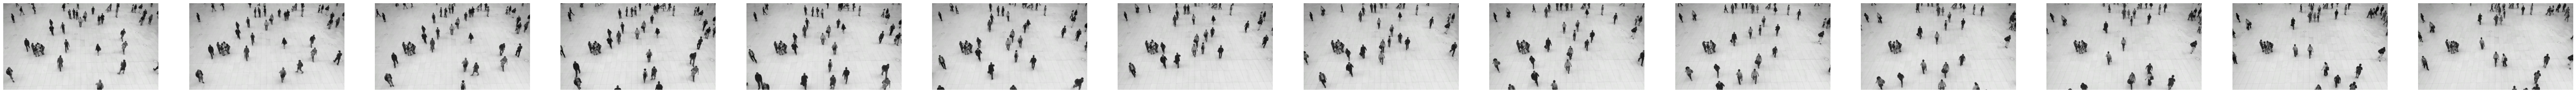

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,14,figsize=(100, 100))

file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  


def extractImages(videoPath):
    try:
        i=0
        vidcap = cv2.VideoCapture(videoPath)
        success,image = vidcap.read()
        success = True
        while success:
            vidcap.set(cv2.CAP_PROP_POS_MSEC,(i*1000))    # read one frame per second
            success,image = vidcap.read()
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axs[i].imshow(image,cmap='jet')
            axs[i].axis('off')
            #cv2.imshow('1 fps',image)
            key = cv2.waitKey(1000)
            if key == ord("q"):
                break
            i+=1
            
    except:
        vidcap.release()
        cv2.destroyAllWindows()

extractImages(file_path)

### Show gray frames and apply basic thresholding

#### Apply basic thresholding -- the first parameter is the image we want to threshold, the second value is is our threshold check; if a pixel value is greater than our threshold (in this case, 200), we set it to be *black, otherwise it is *white*

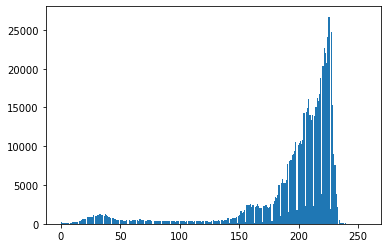

In [3]:
import cv2
import matplotlib.pyplot as plt
# reading the video
file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  

video = cv2.VideoCapture(file_path)
i=0
# running the loop
while(video.isOpened()):
 
    # extracting the frames
    ret, image = video.read()
    if ret:
        # converting to gray-scale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        i+=1
        if i==7:
            
            #hist = cv.calcHist([image],[0],None,[256],[0,256])
            
            plt.hist(image.ravel(),256,[0,256])
            plt.show()
            
        # displaying the video
        cv2.imshow("Gray Frames", gray)
        
        (T, threshInv) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
        cv2.imshow("Basic Threshold for T={:.0f} " .format(T), threshInv)
        
        # exiting the loop
        key = cv2.waitKey(50)
        if key == ord("q"):
            print("VIDEO STOPPED")
            break
    else:
        # closing the window
        cv2.destroyAllWindows()
        video.release()
        break


#### Cet histogramme concerne le frame de la 7ème seconde.

### Segmentation automatique avec Otsu

In [1]:
import cv2
 
# reading the video
file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  

video = cv2.VideoCapture(file_path)
 
# Otsu's thresholding after Gaussian filtering

# running the loop
while(video.isOpened()):
 
    # extracting the frames
    ret, image = video.read()
    if ret:
        # converting to gray-scale
        #blur = cv2.GaussianBlur(image,(5,5),0)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        otsu_threshold, image_result = cv2.threshold(gray,50,255,cv2.THRESH_OTSU)

        
        print('Obtained threshold:{:.0f}' .format(otsu_threshold))

        # displaying the video
        cv2.imshow("Original", gray)
        cv2.imshow("Otsu segmentation", image_result)

        # exiting the loop
        key = cv2.waitKey(50)
        if key == ord("q"):
            break
    else:
        # closing the window
        cv2.destroyAllWindows()
        video.release()
        break



Obtained threshold:133
Obtained threshold:133
Obtained threshold:133
Obtained threshold:133
Obtained threshold:132
Obtained threshold:133
Obtained threshold:132
Obtained threshold:132
Obtained threshold:131
Obtained threshold:131
Obtained threshold:132
Obtained threshold:132
Obtained threshold:131
Obtained threshold:131
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:131
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:133
Obtained threshold:133
Obtained threshold:133
Obtained threshold:132
Obtained threshold:131
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:131
Obtained threshold:132
Obtained threshold:133
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained threshold:132
Obtained th

### Seuillage Heuristique
On choisit le frame 10 (en seconde) pour faire le seuillage, et on choisit initialement T_initial = 230

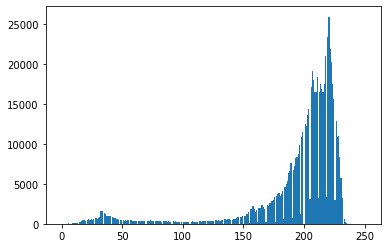

Liste des seuils T intermédiaires: [186, 172, 159, 148, 141, 138]
Nombre des itérations: 6


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def seuillageHeuristique(file_path, frameIndex,initial_T):       
    mean=0
    mean1=0
    c=0
    c1=0
    i=0
    T_current= initial_T
    T_previous=0
    k=0
    liste_t=[]        # pour sauvegarder les seuils intermèdiares
    vidcap = cv2.VideoCapture(file_path)
    success,image = vidcap.read()
    success = True
    while success:
        vidcap.set(cv2.CAP_PROP_POS_MSEC,(i*1000))    # lire un frame par second
        success,image = vidcap.read()
        i+=1
        
        if i==frameIndex:
            
            image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            histogram, bin_edges = np.histogram(image1, bins=256)
            #print(histogram.sum())
            
            fig, ax = plt.subplots()
            ax.bar(bin_edges[:-1], histogram, width=np.diff(bin_edges))

            plt.show()
                
            
            while abs(T_current-T_previous)>5:
                for i,p in enumerate(histogram):
                    if i<T_current :
                        
                        c+=p
                        mean+=i*p
                    else:
                        c1+=p
                        mean1+=i*p
                        
                
                
                mean=mean/c
                mean1=mean1/c1
                T_previous=T_current
                T_current=(mean+mean1)/2
                liste_t.append(T_current)
                k+=1          # count the number of iterations to calculate the correct threshold
                (T, thresh) = cv2.threshold(gray, T_current, 255, cv2.THRESH_BINARY)
                cv2.imshow('Original Frame ({:.0f}th second)'.format(frameIndex),gray)
                cv2.imshow('seuillageHeuristique ({:.0f}th second)'.format(frameIndex),thresh)
                
                #Reinitialisation
                mean=0
                mean1=0
                c=0
                c1=0
                key = cv2.waitKey(1000)
                if key == ord("q"):
                    break
                    
            #print('{:.0f}'.format(mean));print('{:.0f}'.format(mean1))      
            liste_t=list(map(int,liste_t ))
            print("Liste des seuils T intermédiaires:",liste_t)
            print("Nombre des itérations:",k)
            
            
            
file_path = "/Users/khelifibilel/TP_VIDEO/video_1.mp4"  
frameIndex= 10           # The frame of interest (in seconds)
seuillageHeuristique(file_path, frameIndex, 200)   
